In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

In [43]:
print(os.getcwd())

/home/ubuntu/mspr_officiel/EDF_prevision/data


In [44]:
df = pd.read_csv("../data/processed/df_filtre.csv", sep="\t", encoding="latin1")

In [45]:
df.shape

(224256, 9)

<Axes: ylabel='count'>

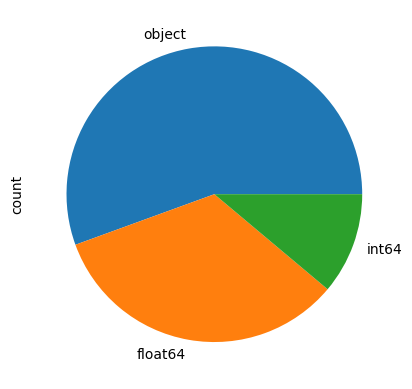

In [46]:
df.dtypes.value_counts().plot.pie()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224256 entries, 0 to 224255
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Type de jour TEMPO  224256 non-null  object 
 1   Date                224256 non-null  object 
 2   Heures              224256 non-null  object 
 3   Prévision J         224256 non-null  float64
 4   Prévision J-1       224256 non-null  float64
 5   Consommation        224256 non-null  float64
 6   Jour                224256 non-null  object 
 7   Weekend             224256 non-null  int64  
 8   Saison              224256 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 15.4+ MB


In [48]:
# Convertir la colonne 'Date' en datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [49]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday
import datetime as dt
from dateutil.easter import easter

In [50]:
# # Définir les jours fériés fixes
# def get_french_fixed_holidays(year):
#     return [
#         dt.date(year, 1, 1),    # Jour de l'an
#         dt.date(year, 5, 1),    # Fête du Travail
#         dt.date(year, 5, 8),    # Victoire 1945
#         dt.date(year, 7, 14),   # Fête nationale
#         dt.date(year, 8, 15),   # Assomption
#         dt.date(year, 11, 1),   # Toussaint
#         dt.date(year, 11, 11),  # Armistice
#         dt.date(year, 12, 25),  # Noël
#     ]

# # Définir les jours fériés mobiles
# def get_french_movable_holidays(year):
#     easter_date = easter(year)
#     return [
#         easter_date + dt.timedelta(days=1),   # Lundi de Pâques
#         easter_date + dt.timedelta(days=39),  # Ascension
#         easter_date + dt.timedelta(days=50),  # Lundi de Pentecôte
#     ]

# # Générer la liste de tous les jours fériés pour la période du dataset
# years = range(df['Date'].dt.year.min(), df['Date'].dt.year.max() + 1)
# all_holidays = []

# for year in years:
#     all_holidays.extend(get_french_fixed_holidays(year))
#     all_holidays.extend(get_french_movable_holidays(year))

# # Convertir les jours fériés en datetime pour comparaison
# all_holidays = pd.to_datetime(all_holidays)

# # Créer la colonne 'jour_ferie'
# df['jour_ferie'] = df['Date'].dt.normalize().isin(all_holidays)

# # Afficher un échantillon
# print(df[['Date', 'jour_ferie']].head())

In [51]:
df.head(7)

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison
0,BLEU,2014-09-01,00:00,42500.0,42600.0,43320.0,Lundi,0,Automne
1,BLEU,2014-09-01,00:30,40300.0,40300.0,41174.0,Lundi,0,Automne
2,BLEU,2014-09-01,01:00,38000.0,37800.0,38430.0,Lundi,0,Automne
3,BLEU,2014-09-01,01:30,38300.0,37800.0,37800.0,Lundi,0,Automne
4,BLEU,2014-09-01,02:00,37400.0,37400.0,37137.0,Lundi,0,Automne
5,BLEU,2014-09-01,02:30,36000.0,36200.0,36664.0,Lundi,0,Automne
6,BLEU,2014-09-01,03:00,34700.0,34600.0,35108.0,Lundi,0,Automne


In [52]:
# df['mois'] = df['Date'].dt.month

In [53]:
# df['jour_semaine'] = df['Date'].dt.weekday + 1

In [54]:
# df.head(6)

In [55]:
# print(df['Saison'].unique())

In [56]:
# # Dictionnaire de correspondance saison → numéro
# saison_mapping = {
#     'Automne': 1,
#     'Hiver': 2,
#     'Printemps': 3,
#     'Été': 4
# }

# # Créer la colonne 'saison_num'
# df['saison_num'] = df['Saison'].map(saison_mapping)

In [57]:
# df.head()

In [58]:
# # Dictionnaire de correspondance TEMPO → numéro
# tempo_mapping = {
#     'BLEU': 1,
#     'BLANC': 2,
#     'ROUGE': 3
# }

# # Créer la colonne 'tempo_num'
# df['tempo_num'] = df['Type de jour TEMPO'].map(tempo_mapping)

In [59]:
# # Conversion de la colonne 'Heures' en objets datetime.time
# df['Heures'] = pd.to_datetime(df['Heures'], format='%H:%M').dt.time

In [60]:
# # Fonction pour attribuer une période
# def get_periode_jour(time_obj):
#     if dt.time(0, 0) <= time_obj < dt.time(5, 0):
#         return 'nuit'
#     elif dt.time(5, 0) <= time_obj < dt.time(12, 0):
#         return 'matin'
#     elif dt.time(12, 0) <= time_obj < dt.time(14, 0):
#         return 'midi'
#     elif dt.time(14, 0) <= time_obj < dt.time(18, 0):
#         return 'après-midi'
#     else:
#         return 'soir'

# # Appliquer la fonction pour créer la colonne
# df['periode_jour'] = df['Heures'].apply(get_periode_jour)

In [61]:
# # Fonction de classification en période (4 valeurs)
# def encoder_periode_jour(time_obj):
#     if dt.time(0, 0) <= time_obj < dt.time(6, 0):
#         return 1  # nuit
#     elif dt.time(6, 0) <= time_obj < dt.time(12, 0):
#         return 2  # matin
#     elif dt.time(12, 0) <= time_obj < dt.time(18, 0):
#         return 3  # après-midi (inclut midi)
#     else:
#         return 4  # soir

# # Créer la colonne encodée
# df['periode_jour_code'] = df['Heures'].apply(encoder_periode_jour)

In [62]:
# df.head()

## fonction préparer les données filter


In [63]:
import datetime as dt
from dateutil.easter import easter

In [64]:
from dateutil.easter import easter

import datetime as dt

def preparer_donnees_tempo(df):
    # Conversion des colonnes Date et Heures
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Heures'] = pd.to_datetime(df['Heures'], format='%H:%M', errors='coerce').dt.time

    # Mois (1 à 12)
    df['mois'] = df['Date'].dt.month

    # Année
    df['annee'] = df['Date'].dt.year

    # Jour de la semaine (1 = lundi, ..., 7 = dimanche)
    df['jour_semaine'] = df['Date'].dt.weekday + 1

    # Saisons encodées (1 = Automne, 2 = Hiver, 3 = Printemps, 4 = Été)
    saison_mapping = {'Automne': 1, 'Hiver': 2, 'Printemps': 3, 'Été': 4}
    df['saison_num'] = df['Saison'].map(saison_mapping)

    # Couleur TEMPO encodée (1 = BLEU, 2 = BLANC, 3 = ROUGE)
    tempo_mapping = {'BLEU': 1, 'BLANC': 2, 'ROUGE': 3}
    df['tempo_num'] = df['Type de jour TEMPO'].map(tempo_mapping)

    # Encodage période de la journée (1 = nuit, 2 = matin, 3 = après-midi, 4 = soir)
    def encoder_periode_jour(time_obj):
        if pd.isnull(time_obj): return None
        if dt.time(0, 0) <= time_obj < dt.time(5, 0): return 1  # nuit
        elif dt.time(5, 0) <= time_obj < dt.time(12, 0): return 2  # matin
        elif dt.time(12, 0) <= time_obj < dt.time(18, 0): return 3  # après-midi
        else: return 4  # soir

    df['periode_jour_code'] = df['Heures'].apply(encoder_periode_jour)

    # Jours fériés (fixes + mobiles)
    def get_french_holidays(year):
        fixed = [
            dt.date(year, 1, 1), dt.date(year, 5, 1), dt.date(year, 5, 8),
            dt.date(year, 7, 14), dt.date(year, 8, 15), dt.date(year, 11, 1),
            dt.date(year, 11, 11), dt.date(year, 12, 25)
        ]
        easter_date = easter(year)
        movable = [
            easter_date + dt.timedelta(days=1),   # Lundi de Pâques
            easter_date + dt.timedelta(days=39),  # Ascension
            easter_date + dt.timedelta(days=50),  # Lundi de Pentecôte
        ]
        return fixed + movable

    years = range(df['Date'].dt.year.min(), df['Date'].dt.year.max() + 1)
    all_holidays = [date for year in years for date in get_french_holidays(year)]
    all_holidays = pd.to_datetime(all_holidays)

    df['jour_ferie'] = df['Date'].dt.normalize().isin(all_holidays)

    return df


In [65]:
df = preparer_donnees_tempo(df)

In [66]:
df.head(5)

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison,mois,annee,jour_semaine,saison_num,tempo_num,periode_jour_code,jour_ferie
0,BLEU,2014-09-01,00:00:00,42500.0,42600.0,43320.0,Lundi,0,Automne,9,2014,1,1,1,1,False
1,BLEU,2014-09-01,00:30:00,40300.0,40300.0,41174.0,Lundi,0,Automne,9,2014,1,1,1,1,False
2,BLEU,2014-09-01,01:00:00,38000.0,37800.0,38430.0,Lundi,0,Automne,9,2014,1,1,1,1,False
3,BLEU,2014-09-01,01:30:00,38300.0,37800.0,37800.0,Lundi,0,Automne,9,2014,1,1,1,1,False
4,BLEU,2014-09-01,02:00:00,37400.0,37400.0,37137.0,Lundi,0,Automne,9,2014,1,1,1,1,False


In [67]:
# # Sauvegarder le nouveau fichier
# df.to_csv("df_filtre_prepare.csv", index=False, sep=';', encoding='utf-8')

In [68]:
 
df['Heures'] = pd.to_datetime(df['Heures'], format='%H:%M:%S', errors='coerce')

In [69]:
df['Heures_float'] = df['Heures'].dt.hour + df['Heures'].dt.minute / 60

In [70]:
df.head(5)

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison,mois,annee,jour_semaine,saison_num,tempo_num,periode_jour_code,jour_ferie,Heures_float
0,BLEU,2014-09-01,1900-01-01 00:00:00,42500.0,42600.0,43320.0,Lundi,0,Automne,9,2014,1,1,1,1,False,0.0
1,BLEU,2014-09-01,1900-01-01 00:30:00,40300.0,40300.0,41174.0,Lundi,0,Automne,9,2014,1,1,1,1,False,0.5
2,BLEU,2014-09-01,1900-01-01 01:00:00,38000.0,37800.0,38430.0,Lundi,0,Automne,9,2014,1,1,1,1,False,1.0
3,BLEU,2014-09-01,1900-01-01 01:30:00,38300.0,37800.0,37800.0,Lundi,0,Automne,9,2014,1,1,1,1,False,1.5
4,BLEU,2014-09-01,1900-01-01 02:00:00,37400.0,37400.0,37137.0,Lundi,0,Automne,9,2014,1,1,1,1,False,2.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224256 entries, 0 to 224255
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Type de jour TEMPO  224256 non-null  object        
 1   Date                224256 non-null  datetime64[ns]
 2   Heures              224256 non-null  datetime64[ns]
 3   Prévision J         224256 non-null  float64       
 4   Prévision J-1       224256 non-null  float64       
 5   Consommation        224256 non-null  float64       
 6   Jour                224256 non-null  object        
 7   Weekend             224256 non-null  int64         
 8   Saison              224256 non-null  object        
 9   mois                224256 non-null  int32         
 10  annee               224256 non-null  int32         
 11  jour_semaine        224256 non-null  int32         
 12  saison_num          224256 non-null  int64         
 13  tempo_num           224256 no

In [72]:
#  4. Tri chronologique et création de lags (15, 30, 45, 60 min)
df = df.sort_values(['Date', 'Heures_float']).reset_index(drop=True)
for lag in [1, 2, 3, 4]:
    df[f'lag_{lag}'] = df['Consommation'].shift(lag)
df = df.dropna().reset_index(drop=True)

In [73]:
df.head(5)

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison,mois,...,jour_semaine,saison_num,tempo_num,periode_jour_code,jour_ferie,Heures_float,lag_1,lag_2,lag_3,lag_4
0,BLEU,2014-09-01,1900-01-01 02:00:00,37400.0,37400.0,37137.0,Lundi,0,Automne,9,...,1,1,1,1,False,2.0,37800.0,38430.0,41174.0,43320.0
1,BLEU,2014-09-01,1900-01-01 02:30:00,36000.0,36200.0,36664.0,Lundi,0,Automne,9,...,1,1,1,1,False,2.5,37137.0,37800.0,38430.0,41174.0
2,BLEU,2014-09-01,1900-01-01 03:00:00,34700.0,34600.0,35108.0,Lundi,0,Automne,9,...,1,1,1,1,False,3.0,36664.0,37137.0,37800.0,38430.0
3,BLEU,2014-09-01,1900-01-01 03:30:00,33700.0,33800.0,34218.0,Lundi,0,Automne,9,...,1,1,1,1,False,3.5,35108.0,36664.0,37137.0,37800.0
4,BLEU,2014-09-01,1900-01-01 04:00:00,33300.0,33300.0,33649.0,Lundi,0,Automne,9,...,1,1,1,1,False,4.0,34218.0,35108.0,36664.0,37137.0


## Nettoyage et selection des variables

In [74]:
# # Supprimer les colonnes inutiles pour le modèle
# df_model = df.drop(columns=['Type de jour TEMPO','Date','Heures','Prévision J', 'Prévision J-1', 'Jour', 'Saison','Jour','])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224252 entries, 0 to 224251
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Type de jour TEMPO  224252 non-null  object        
 1   Date                224252 non-null  datetime64[ns]
 2   Heures              224252 non-null  datetime64[ns]
 3   Prévision J         224252 non-null  float64       
 4   Prévision J-1       224252 non-null  float64       
 5   Consommation        224252 non-null  float64       
 6   Jour                224252 non-null  object        
 7   Weekend             224252 non-null  int64         
 8   Saison              224252 non-null  object        
 9   mois                224252 non-null  int32         
 10  annee               224252 non-null  int32         
 11  jour_semaine        224252 non-null  int32         
 12  saison_num          224252 non-null  int64         
 13  tempo_num           224252 no

In [76]:
df.columns

Index(['Type de jour TEMPO', 'Date', 'Heures', 'Prévision J', 'Prévision J-1',
       'Consommation', 'Jour', 'Weekend', 'Saison', 'mois', 'annee',
       'jour_semaine', 'saison_num', 'tempo_num', 'periode_jour_code',
       'jour_ferie', 'Heures_float', 'lag_1', 'lag_2', 'lag_3', 'lag_4'],
      dtype='object')

In [77]:
#Supprimer les colonnes inutiles pour le modèle
df_model = df.drop(columns=['Type de jour TEMPO','Date','Heures','Prévision J', 'Prévision J-1', 'Jour', 'Saison','Jour'])
df_model = df_model.dropna()

In [78]:
df_model.head(5)

,Consommation,Weekend,mois,annee,jour_semaine,saison_num,tempo_num,periode_jour_code,jour_ferie,Heures_float,lag_1,lag_2,lag_3,lag_4
0,37137.0,0,9,2014,1,1,1,1,False,2.0,37800.0,38430.0,41174.0,43320.0
1,36664.0,0,9,2014,1,1,1,1,False,2.5,37137.0,37800.0,38430.0,41174.0
2,35108.0,0,9,2014,1,1,1,1,False,3.0,36664.0,37137.0,37800.0,38430.0
3,34218.0,0,9,2014,1,1,1,1,False,3.5,35108.0,36664.0,37137.0,37800.0
4,33649.0,0,9,2014,1,1,1,1,False,4.0,34218.0,35108.0,36664.0,37137.0


In [79]:
df_model.shape

(224252, 14)

In [80]:
# Séparation features / target
X = df_model.drop(columns=['Consommation'])
y = df_model['Consommation']

## XGBOOST

In [81]:
#Split temporel (80% entraînement / 20% test)
split_index = int(len(df_model) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [82]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse}")
print(f"✅ R² : {r2}")

✅ RMSE : 372.73016353824073
✅ R² : 0.9986673659934796


In [85]:
#  Évaluation train / test
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

In [86]:
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test  = r2_score(y_test,  y_test_pred)
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

In [87]:
# 9. Vérification de l'overfitting
diff_r2 = r2_train - r2_test
status = "Overfitting détecté" if diff_r2 > 0.05 else "Pas (ou peu) d'overfitting"

print(f"Train R²: {r2_train:.4f}, Train RMSE: {rmse_train:.2f}")
print(f"Test  R²: {r2_test:.4f}, Test  RMSE: {rmse_test:.2f}")
print(f"Différence R² (Train - Test): {diff_r2:.4f} → {status}")

Train R²: 0.9989, Train RMSE: 387.69
Test  R²: 0.9987, Test  RMSE: 372.73
Différence R² (Train - Test): 0.0002 → Pas (ou peu) d'overfitting


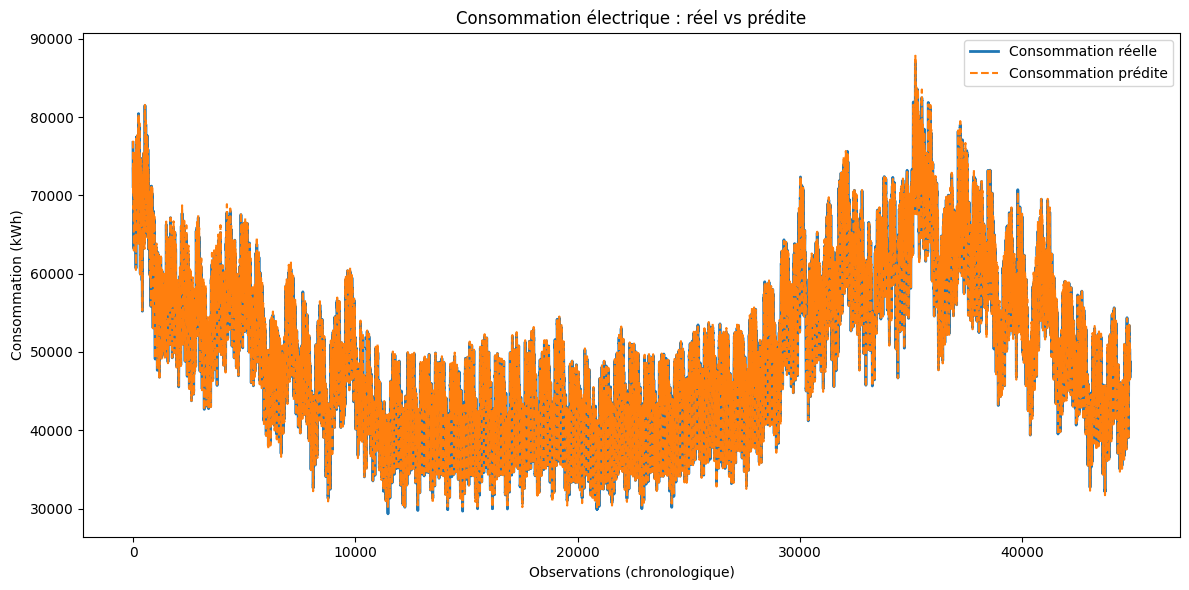

In [88]:
# 1. Courbe chronologique
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Consommation réelle', linewidth=2)
plt.plot(y_test_pred,   label='Consommation prédite', linestyle='--')
plt.legend()
plt.title('Consommation électrique : réel vs prédite')
plt.xlabel('Observations (chronologique)')
plt.ylabel('Consommation (kWh)')
plt.tight_layout()
plt.show()

## RandomizedSearchCV large pour explorer rapidement

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Séparation en train/test (pas de shuffle car série temporelle)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [91]:
# Grille large pour exploration
param_dist = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 1.5],
}

In [92]:
# Modèle de base
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 6, 8],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0.5, 1, 1.5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [93]:
# Afficher les meilleurs paramètres trouvés
print("🔍 Meilleurs paramètres RandomizedSearchCV :")
print(random_search.best_params_)

🔍 Meilleurs paramètres RandomizedSearchCV :
{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [94]:
from sklearn.model_selection import GridSearchCV

# Récupérer les meilleurs paramètres comme base
best_params = random_search.best_params_

In [95]:
# Grille affinée autour des meilleures valeurs
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 100, best_params['n_estimators'], best_params['n_estimators'] + 100],
    'learning_rate': [best_params['learning_rate'] / 2, best_params['learning_rate'], best_params['learning_rate'] * 2],
    'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
    'subsample': [best_params['subsample']],
    'colsample_bytree': [best_params['colsample_bytree']],
    'reg_alpha': [best_params['reg_alpha']],
    'reg_lambda': [best_params['reg_lambda']]
}

xgb_tuned = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("🏆 Meilleurs paramètres après GridSearch ciblé :")
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


🏆 Meilleurs paramètres après GridSearch ciblé :
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1100, 'reg_alpha': 0.5, 'reg_lambda': 1.5, 'subsample': 1.0}


# evaluer et sauvegarder le meilleur modèle

In [96]:
import joblib

In [97]:
# Meilleur modèle final issu du GridSearch
best_model = grid_search.best_estimator_

# Prédiction sur le jeu de validation
y_pred_val = best_model.predict(X_val)

# Évaluation
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

# Résultats
print(f"📉 RMSE finale : {rmse_val:.2f}")
print(f"📈 R² (score de détermination) : {r2_val:.4f}")

📉 RMSE finale : 297.20
📈 R² (score de détermination) : 0.9992


In [107]:
# Sauvegarde du modèle final
# joblib.dump(best_model, "xgboost_conso_best_model_hybride.pkl")
# print("✅ Modèle sauvegardé sous 'xgboost_conso_best_model_hybride.pkl'")


joblib.dump(best_model, "../models/xgboost_conso_best_model_hybride.pkl")
print("✅ Modèle sauvegardé sous 'xgboost_conso_best_model_hybride.pkl'")

PermissionError: [Errno 13] Permission denied: '/models'

In [108]:
import os
import joblib

# Créer un répertoire 'models' dans le répertoire courant (chemin relatif)
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, "models/xgboost_conso_best_model_hybride.pkl")
print("✅ Modèle sauvegardé sous 'models/xgboost_conso_best_model_hybride.pkl'")

✅ Modèle sauvegardé sous 'models/xgboost_conso_best_model_hybride.pkl'
